# Lab 5

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.linalg as sls
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import random

## Problem 1

### Part 1

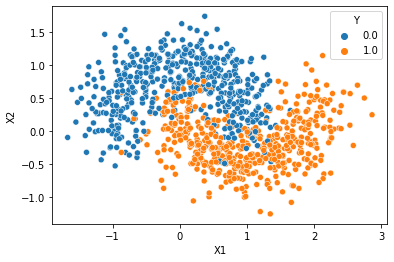

<AxesSubplot:xlabel='X1', ylabel='X2'>

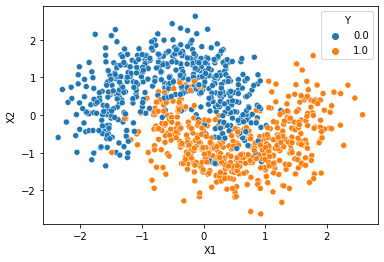

In [ ]:
dataset = make_moons(n_samples = 1000 ,shuffle = True , random_state = 42 ,noise = 0.3)
# dataset = pd.DataFrame(data = dataset[0,:])
dataset_2 = np.c_[dataset[0],dataset[1]]
dataset_2 = pd.DataFrame(data = dataset_2,columns = ["X1","X2","Y"])
dataset_2 = dataset_2.dropna()
dataset_2
# sns.catplot(data = dataset_2,x = "X1",y="X2",hue ="Y")
sc = StandardScaler()
new_dataset = dataset_2.copy()
X = new_dataset[["X1","X2"]]
Y = new_dataset["Y"]
sc.fit(X)
X = sc.transform(X)
final_dataset = np.c_[X,Y]
final_dataset = pd.DataFrame(data = final_dataset , columns = ["X1","X2","Y"])

sns.scatterplot(data = dataset_2,x="X1",y = "X2",hue = "Y")
plt.show()
sns.scatterplot(data = final_dataset,x="X1",y = "X2",hue = "Y")


In [ ]:
X = final_dataset[["X1","X2"]]
Y = final_dataset["Y"]
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.2,shuffle = True)
X_test

,X1,X2
107,1.665611,-0.160314
264,-0.946525,1.582892
161,1.064803,-1.107842
199,0.732462,0.221788
645,-1.227080,-1.005358
...,...,...
727,-0.149865,0.803019
508,1.502003,0.806954
110,-0.360091,0.424348
100,0.509779,-2.180609


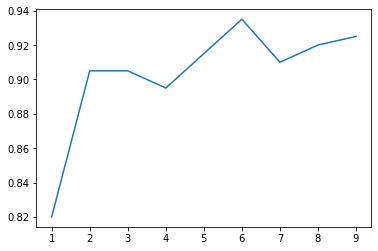

In [ ]:
arr = []
arrr = []
for i in range(1,10):
  model = DTC(max_depth = i)
  model.fit(X_train,Y_train)
  acc = accuracy_score(Y_test,model.predict(X_test))
  arr.append(acc)
  arrr.append(i)
  # print(i,acc)
plt.plot(arrr,arr)
X = X.to_numpy()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


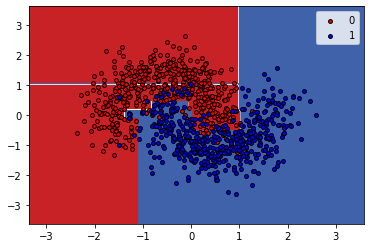

0.935


In [ ]:
model = DTC(max_depth=6)
model.fit(X_train,Y_train)
# X = X.to_numpy()
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
# print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
plt.legend()
plt.show()
print(accuracy_score(Y_test,model.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


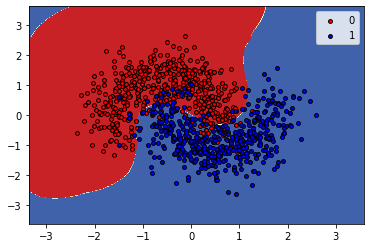

0.925


In [ ]:
model_BC = BaggingClassifier(base_estimator = SVC(), n_estimators=10, random_state=314)
model_BC.fit(X_train,Y_train)
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
# print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
Z = model_BC.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
plt.legend()
plt.show()
print(accuracy_score(Y_test,model_BC.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


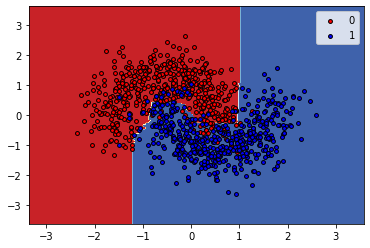

0.93


In [ ]:
model_RC = RandomForestClassifier(max_depth=6)
model_RC.fit(X_train,Y_train)
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
# print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
Z = model_RC.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
plt.legend()
plt.show()
print(accuracy_score(Y_test,model_RC.predict(X_test)))

In [ ]:
# The decion boundary in case of random forest and decision tree is similar but boundary of random forest is more smooth
# The accuracy of of random forest classifier is higher than the bagging classifier followed by decision tree classifier

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


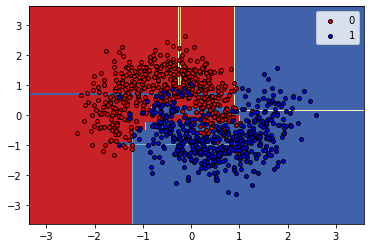

1 0.87


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


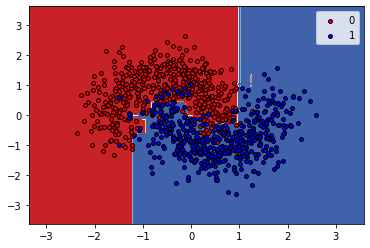

11 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


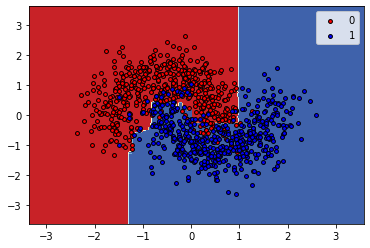

21 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


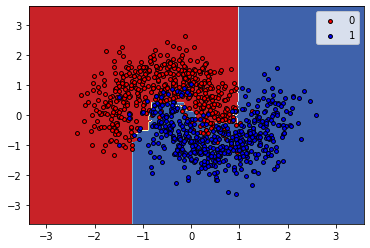

31 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


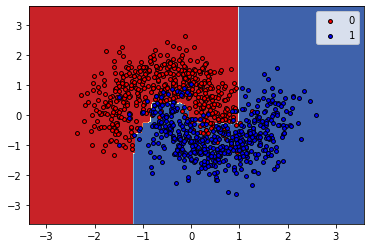

41 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


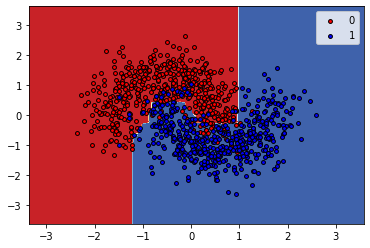

51 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


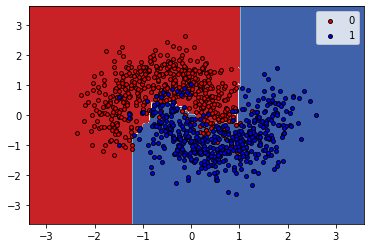

61 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


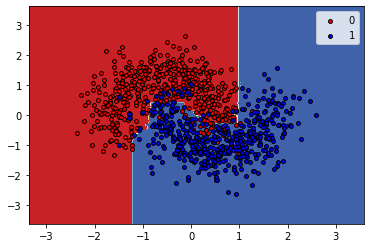

71 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


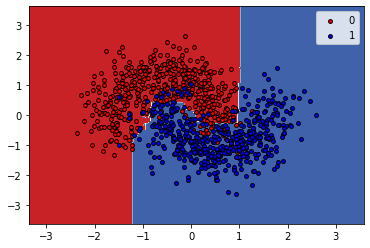

81 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


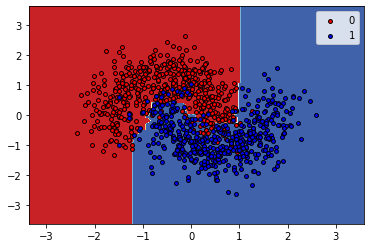

91 0.93


In [ ]:
for j in range(1,101,10):
  model_RC = RandomForestClassifier(max_depth=6,n_estimators=j)
  model_RC.fit(X_train,Y_train)
  classes = [0,1]
  plot_step = 0.02
  plot_colors = 'rb'
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
  # print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
  Z = model_RC.predict(np.c_[xx.ravel(),yy.ravel()])
  Z= Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  # Plot the training points
  for i, color in zip(range(len(classes)), plot_colors):
      idx = np.where(Y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
  plt.legend()
  plt.show()
  print(j,accuracy_score(Y_test,model_RC.predict(X_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


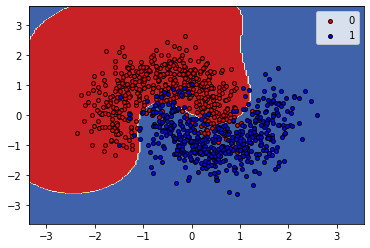

1 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


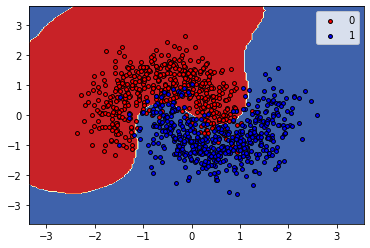

11 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


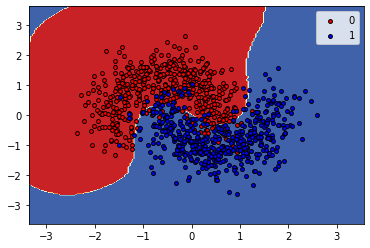

21 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


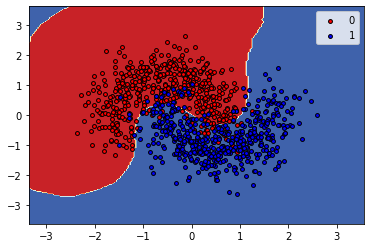

31 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


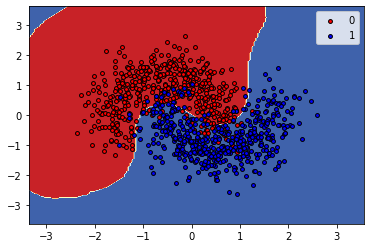

41 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


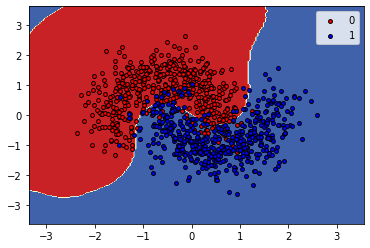

51 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


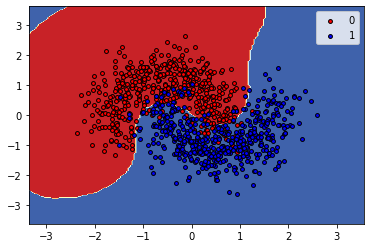

61 0.93


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


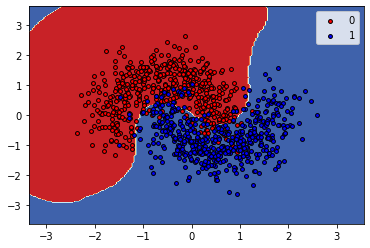

71 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


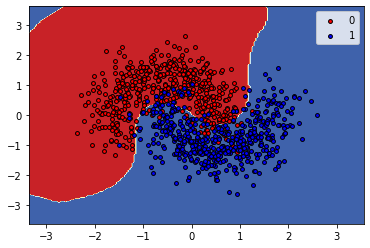

81 0.925


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


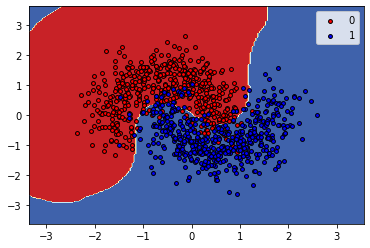

91 0.925


In [ ]:
for j in range(1,101,10):
  model_BC = BaggingClassifier(base_estimator = SVC(), n_estimators=j, random_state=314)
  model_BC.fit(X_train,Y_train)
  classes = [0,1]
  plot_step = 0.04
  plot_colors = 'rb'
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                      np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
  # print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
  Z = model_BC.predict(np.c_[xx.ravel(),yy.ravel()])
  Z= Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  # Plot the training points
  for i, color in zip(range(len(classes)), plot_colors):
      idx = np.where(Y == i)
      plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
  plt.legend()
  plt.show()
  print(j,accuracy_score(Y_test,model_BC.predict(X_test)))

In [ ]:
## The obtained decision boundaries are similar and the variation in accuracy is very less.

### Part 2

In [ ]:
class BaggingClassifier_scratch:
    def __init__(self,n_estimators,dataset):
      self._n_estimators = n_estimators
      self.dataset = dataset
    def _Bagging(self):
      tempX_train,tempX_test,tempY_train,tempY_test = tts(self.dataset[list(self.dataset.columns)[0:len(list(self.dataset.columns))-1]],self.dataset[self.dataset.columns[-1]],test_size = 0.2,shuffle=True)
      new_dataset = [] #creating a new container to store all the bagged datasets
      index = tempX_train.index #get an array of indexes of dataset to iterate through it
      cols = list(X_train.columns)
      cols.append("Y")
      for i in range(self._n_estimators): # iterating number of n_estimator times
        tempdataset= [] #creating a temporary container to store one of the bagged dataset
        for j in range(len(index)): #iterating through the dataset
          ind = random.randint(0,len(index)-1) #selecting any index among the row
          vectX = tempX_train.iloc[ind,:] #selecting the random row from the dataset
          vectY = tempY_train.iloc[ind]
          vect = np.append(np.array(vectX),np.array([vectY]))
          tempdataset.append(vect) #append the row   
        dataframe = pd.DataFrame(tempdataset,columns = cols)
        new_dataset.append(dataframe) #converting the list again into dataframe
      self.dataset = new_dataset
      self.tempX_train = tempX_train
      self.tempX_test = tempX_test
      self.tempY_train = tempY_train
      self.tempY_test = tempY_test
    def Train(self):
      self._Bagging()
    def Test(self):
      final_lis = []
      for i in range(self._n_estimators):
        temp_model = DTC(max_depth = 6)
        temp_model.fit(self.dataset[i][(self.dataset[i].columns)[0:len((self.dataset[i].columns))-1]],self.dataset[i]["Y"])
        lis = []
        for j in self.tempX_test.index:
          val = temp_model.predict(self.tempX_test.loc[[j]])
          lis.append(val[0])
        final_lis.append(lis)
      y_pred = []
      for i in range(len(final_lis[0])):
        arr  = []
        for j in final_lis:
          arr.append(j[i])
        res = max(set(arr), key = arr.count)
        y_pred.append(res)
      # print(len(final_lis))
      self.accuracy = accuracy_score(self.tempY_test,y_pred)
    def accuracy_model(self):
      return self.accuracy
    def plot_decision_boundary(self):
      for i in range(self._n_estimators):
        temp_model = DTC(max_depth = 6)
        temp_model.fit(self.dataset[i][(self.dataset[i].columns)[0:len((self.dataset[i].columns))-1]],self.dataset[i]["Y"])
        acc = accuracy_score(self.tempY_test,temp_model.predict(self.tempX_test))
        classes = np.unique(self.tempY_test)
        plot_step = 0.04
        plot_colors = 'rb'
        temp = self.tempX_test.to_numpy()
        x_min, x_max = temp[:, 0].min() - 1, temp[:, 0].max() + 1
        y_min, y_max = temp[:, 1].min() - 1, temp[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                            np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
        Z = temp_model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z= Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        for k, color in zip(range(len(classes)), plot_colors):
            idx = np.where(self.tempY_test == k)
            plt.scatter(temp[idx, 0], temp[idx, 1], c=color, label=k,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
        plt.legend()
        plt.title("Accuracy=" + str(acc))
        plt.show()

Overall accuracy is 0.94


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


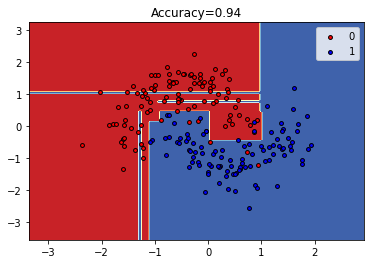

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


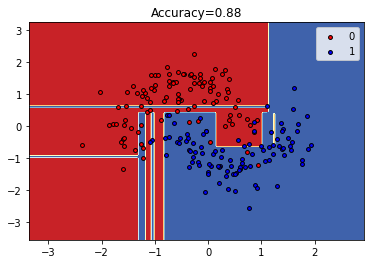

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


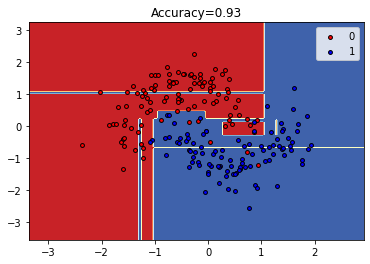

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


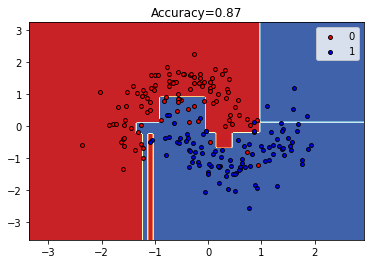

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


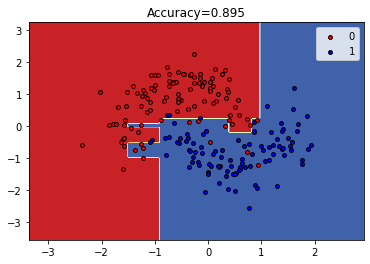

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


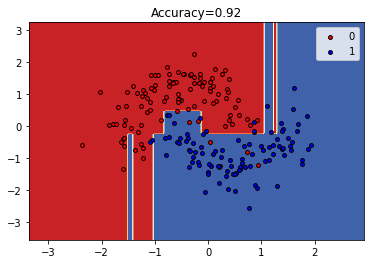

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


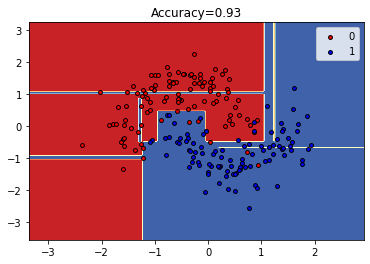

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


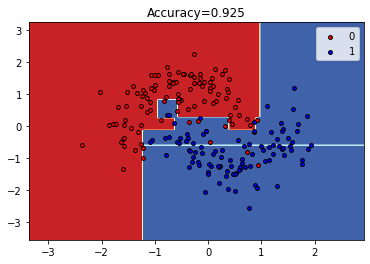

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


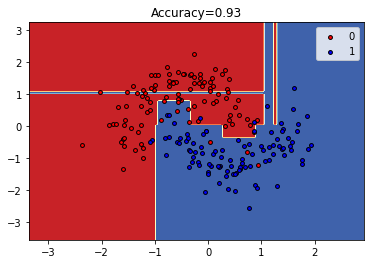

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


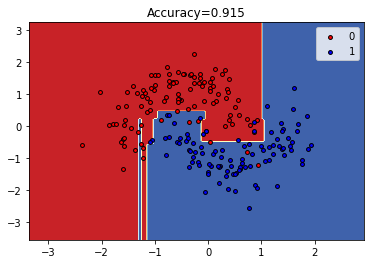

In [ ]:
model = BaggingClassifier_scratch(10,final_dataset)
model.Train()
model.Test()
print("Overall accuracy is",model.accuracy_model())
model.plot_decision_boundary()

## Problem 2

### Part 1

In [ ]:
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model_adaboost = ABC()
model_adaboost.fit(X_train,Y_train)
print(accuracy_score(Y_test,model_adaboost.predict(X_test)))

0.915


### Part 2

In [ ]:
import xgboost as XGB

In [ ]:
model_xgboost = XGB.XGBClassifier().fit(X_train,Y_train)
Y_pred = model_xgboost.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.935


### Part 3

In [ ]:
print("accuracy on train set of adaboost model")
print(accuracy_score(Y_train,model_adaboost.predict(X_train)))

print("accuracy on test set of adaboost model")
print(accuracy_score(Y_test,model_adaboost.predict(X_test)))

print("accuracy on train set of xgboost model")
Y_pred_train = model_xgboost.predict(X_train)
print(accuracy_score(Y_train,Y_pred_train))

print("accuracy on test set of xgboost model")
Y_pred_test = model_xgboost.predict(X_test)
print(accuracy_score(Y_test,Y_pred_test))

accuracy on train set of adaboost model
0.93625
accuracy on test set of adaboost model
0.915
accuracy on train set of xgboost model
0.93
accuracy on test set of xgboost model
0.935


### Part 4

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error as mse

In [ ]:
from lightgbm.sklearn import LGBMClassifier

for i in range(7,36,7):
  model_lgb = lgb.LGBMClassifier(num_leaves = i).fit(X_train,Y_train)
  y_pred = model_lgb.predict(X_test)
  mse_val = accuracy_score(Y_test,y_pred)
  print("num_leaves=",i,"accuracy=",mse_val)

num_leaves= 7 accuracy= 0.925
num_leaves= 14 accuracy= 0.91
num_leaves= 21 accuracy= 0.89
num_leaves= 28 accuracy= 0.895
num_leaves= 35 accuracy= 0.895


### Part 5 & 6

num_leaves= 2 accuracy_test= 0.9
num_leaves= 3 accuracy_test= 0.915
num_leaves= 4 accuracy_test= 0.93
num_leaves= 5 accuracy_test= 0.93
num_leaves= 6 accuracy_test= 0.925
num_leaves= 7 accuracy_test= 0.925
num_leaves= 8 accuracy_test= 0.92
num_leaves= 9 accuracy_test= 0.915
num_leaves= 10 accuracy_test= 0.905
num_leaves= 11 accuracy_test= 0.905
num_leaves= 12 accuracy_test= 0.91
num_leaves= 13 accuracy_test= 0.91
num_leaves= 14 accuracy_test= 0.91
num_leaves= 15 accuracy_test= 0.905
num_leaves= 16 accuracy_test= 0.91
num_leaves= 17 accuracy_test= 0.895
num_leaves= 18 accuracy_test= 0.9
num_leaves= 19 accuracy_test= 0.895
num_leaves= 20 accuracy_test= 0.895
num_leaves= 21 accuracy_test= 0.89
num_leaves= 22 accuracy_test= 0.895
num_leaves= 23 accuracy_test= 0.91
num_leaves= 24 accuracy_test= 0.89
num_leaves= 25 accuracy_test= 0.9
num_leaves= 26 accuracy_test= 0.9
num_leaves= 27 accuracy_test= 0.895
num_leaves= 28 accuracy_test= 0.895
num_leaves= 29 accuracy_test= 0.895


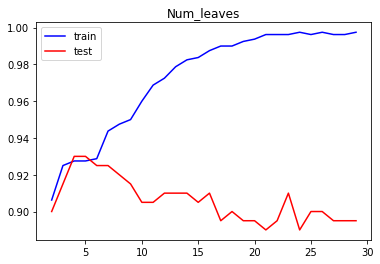

In [ ]:
acc_train_lis = []
acc_test_lis = []
lis = []
for i in range(2,30):
  model_lgb = lgb.LGBMClassifier(num_leaves = i).fit(X_train,Y_train)
  y_pred = model_lgb.predict(X_test)
  acc_test = accuracy_score(Y_test,y_pred)
  acc_test_lis.append(acc_test)
 
  y_pred_train = model_lgb.predict(X_train)
  acc_train = accuracy_score(Y_train,y_pred_train)
  acc_train_lis.append(acc_train)

  lis.append(i)
  print("num_leaves=",i,"accuracy_test=",acc_test)
plt.plot(lis,acc_train_lis,color ='b',label = "train")
plt.plot(lis,acc_test_lis,color = 'r',label = "test")
plt.title("Num_leaves")
plt.legend()

max_depth= 1 accuracy_test= 0.9
max_depth= 2 accuracy_test= 0.925
max_depth= 3 accuracy_test= 0.935
max_depth= 4 accuracy_test= 0.93
max_depth= 5 accuracy_test= 0.915
max_depth= 6 accuracy_test= 0.905
max_depth= 7 accuracy_test= 0.905
max_depth= 8 accuracy_test= 0.915
max_depth= 9 accuracy_test= 0.895


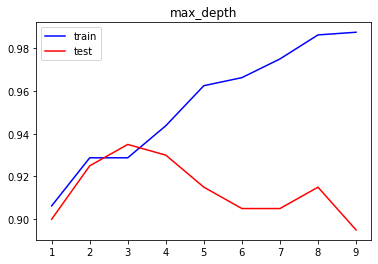

In [ ]:
acc_train_lis = []
acc_test_lis = []
lis = []
for i in range(1,10):
  model_lgb = lgb.LGBMClassifier(max_depth = i).fit(X_train,Y_train)
  y_pred = model_lgb.predict(X_test)
  acc_test = accuracy_score(Y_test,y_pred)
  acc_test_lis.append(acc_test)
 
  y_pred_train = model_lgb.predict(X_train)
  acc_train = accuracy_score(Y_train,y_pred_train)
  acc_train_lis.append(acc_train)

  lis.append(i)
  print("max_depth=",i,"accuracy_test=",acc_test)
plt.plot(lis,acc_train_lis,color ='b',label = "train")
plt.plot(lis,acc_test_lis,color = 'r',label = "test")
plt.title("max_depth")
plt.legend()

### Part 7

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


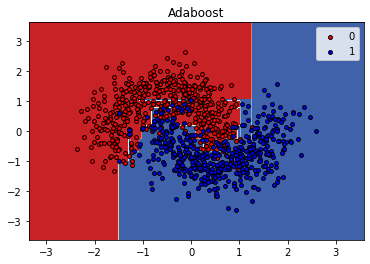

In [ ]:
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
# print(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
Z = model_adaboost.predict(np.c_[xx.ravel(),yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdYlBu, edgecolor='black',s=15)
plt.legend()
plt.title("Adaboost")
plt.show()
# print(accuracy_score(Y_test,model_adaboost.predict(X_test)))

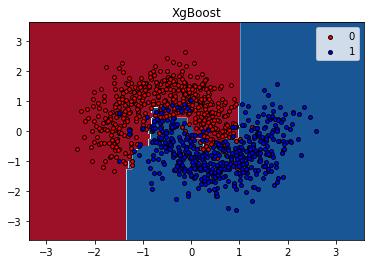

In [ ]:
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
df = pd.DataFrame(data = np.c_[xx.ravel(),yy.ravel()],columns = ["X1","X2"])
Z = model_xgboost.predict(df)
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdBu, edgecolor='black',s=15)
plt.legend()
plt.title("XgBoost")
plt.show()

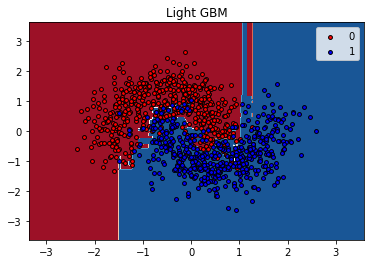

In [ ]:
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = model_lgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdBu, edgecolor='black',s=15)
plt.legend()
plt.title("Light GBM")
plt.show()

## Problem 3

### Part 1

In [ ]:
model_bayes = GaussianNB()
model_bayes.fit(X_train,Y_train)
print(accuracy_score(Y_test,model_bayes.predict(X_test)))

0.835


### Part 2

In [ ]:
## 1) Random Forest Classifier with max_depth = 6 and n_estimator = 21
## 2) Adaboost 
## 3) LightGBM with max_depth = 5 and num_leaves = 21

In [ ]:
model_voting_clf = VotingClassifier(estimators = [('rf',model_RC),('adb',model_adaboost),('lgb',model_lgb),('gnb',model_bayes)],voting = 'hard')
model_voting_clf.fit(X_train,Y_train)
print(accuracy_score(Y_test,model_voting_clf.predict(X_test)))

0.91


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


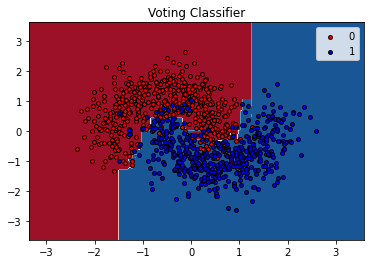

In [ ]:
classes = [0,1]
plot_step = 0.02
plot_colors = 'rb'
X = X.to_numpy()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                    np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = model_voting_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)
# Plot the training points
for i, color in zip(range(len(classes)), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,cmap=plt.cm.RdBu, edgecolor='black',s=15)
plt.legend()
plt.title("Voting Classifier")
plt.show()